<a href="https://colab.research.google.com/github/AlejandroPSJ2/Data_Mining/blob/clustering/Clase2_clustering_cat_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LIBRERIAS BASICAS
!pip install kmodes
from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
%matplotlib inline

In [ ]:
# FUNCIONES PARA CLUSTERING

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   

def centroides(a,b):
    g = {}
    for i in range(0,b.labels_.max()+1):
        g1 = pd.DataFrame(data=b.cluster_centroids_[0][i])
        g2 = pd.DataFrame(data=b.cluster_centroids_[1][i])                 
        g1 = g1.append(g2)
        g[i] = g1.copy()
        g[i].rename(columns={0:i},inplace=True)
        g[i] = g[i].reset_index()
        g[i].drop(columns='index',inplace=True)

    gx = g[0]
    for i in range(1,b.labels_.max()+1):
        gx = gx.join(g[i])

    centroids = pd.DataFrame(data=gx.T)
    centroids = centroids.reset_index()
    centroids.rename(columns={'index':'cluster'},inplace=True)

    cols = a.columns
    num_cols = list(set(a._get_numeric_data().columns))
    cat_cols = list(set(cols) - set(num_cols))

    for i in range(0,len(num_cols)):
        centroids.rename(columns={i:num_cols[i]},inplace=True)
    j = 0
    for i in range(len(num_cols),len(cols)):
        centroids.rename(columns={i:cat_cols[j]},inplace=True)
        j = j+1
    return centroids
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X,catx):
    cost = []
    K = range(1,7)
    for k in K:
        kproto = KPrototypes(n_clusters=k, init='Cao')
        kproto.fit_predict(X, categorical=catx)
        cost.append(kproto.cost_)

    plt.plot(K,cost, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    return cost

In [ ]:
#DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/AlejandroPSJ2/Data_Mining/main/clustering_categorical_clean.csv'
df = pd.read_csv(url,sep=';')
df.head()

,id,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,236,42,303044,9,Other,Male,0,0,40,Other
1,1820,40,121956,13,Other,Male,13550,0,40,Other
2,3945,37,191342,2,Other,Male,0,0,40,Other
3,4380,25,228608,10,Other,Female,0,0,40,Other
4,104,56,335605,9,White,Male,0,1887,50,Other


In [ ]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

#X = df.drop(columns='id')
X = df.drop(columns=['id','fnlwgt','capital-loss','capital-gain'])
x_cat=[2,3,5]

[1590086.4254715985, 996695.2921186631, 725342.9186930896, 563985.0856822091, 450316.8423774682, 381627.46415905753]


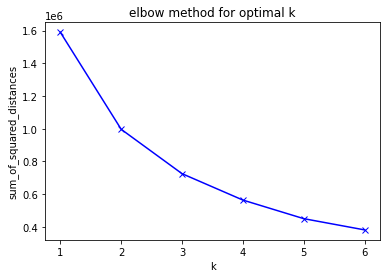

In [ ]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X,x_cat))

In [ ]:
# ALGORITHM FIT

kproto = KPrototypes(n_clusters=4, init='Cao').fit(X, categorical=x_cat)

In [ ]:
# CLUSTER CENTROIDS

print('Centroides optimos de clusteres')
print(centroides(X,kproto))

Centroides optimos de clusteres
   cluster      age education-num hours-per-week    sex    race native-country
0        0  30.3551       10.0691        41.1474  White    Male            USA
1        1  53.0486       9.91875        38.3903  White    Male            USA
2        2   40.931       11.0547        58.8333  White    Male            USA
3        3  24.0901       9.58281         20.935  White  Female            USA


In [ ]:
# CLUSTER RESULTS

print('Asignacion de clusteres segun cada observacion')
print(clusteres(df,kproto.labels_).head())

Asignacion de clusteres segun cada observacion
     id  age  fnlwgt  ...  hours-per-week native-country cluster
0   236   42  303044  ...              40          Other       1
1  1820   40  121956  ...              40          Other       0
2  3945   37  191342  ...              40          Other       0
3  4380   25  228608  ...              40          Other       0
4   104   56  335605  ...              50          Other       1

[5 rows x 11 columns]


In [ ]:
# EXPORT RESULTS
centroides(X,kproto).to_csv('centroides.csv') 
files.download('centroides.csv')

clusteres(df,kproto.labels_).to_csv('resultados.csv') 
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")
